# Exploratory Data Analysis (EDA) of Amazon Product dataset

# Libraries 

In [16]:
pip show kagglehub

Name: kagglehub
Version: 0.3.11
Summary: Access Kaggle resources anywhere
Home-page: https://github.com/Kaggle/kagglehub
Author: 
Author-email: Kaggle <support@kaggle.com>
License: Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definition,
      "control" means (i) the power, direct or indirect, to cause the
      direction or management of such entity

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter

%matplotlib inline

In [21]:
# Loading and exporting the dataset from kaggle
# Install dependencies as needed:
#pip install kagglehub[pandas-datasets.csv]

# Set the path to the file you'd like to load
file_path = "amz_uk_price_prediction_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"asaniczka/uk-optimal-product-price-prediction", file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/var/folders/rx/4vz0nngn7_q84td2symm90y40000gn/T/ipykernel_21574/480125339.py:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"asaniczka/uk-optimal-product-price-prediction", file_path,


First 5 records:    uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


# Exploration
Exploring the following:
- Numerical Measures: numerical and categorical variables.
- Visual Representations: Exploring histograms, scatter plots, pie charts and more. 
- Univariate: Describing the charracteristics of a single variable at a time. 
- Bivariate: Analyzing relationships between two variables. 

**Initial Exploration**

In [22]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [23]:
df.shape

(2443651, 9)

In [24]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

**Exploring numerical and categorial variables**

In [25]:
# retrieving the uniwue data types present in the dataframe colums
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('bool'), dtype('int64'), dtype('float64')]

In [26]:
# extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [27]:
# Counting and sorting the unique calues for each numerical column in descending
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [28]:
#Seperating between discrete and continous variables, as discreate ones could potentially be treated as categorical. 
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [29]:
# Retrieving column names with object (typically string) data types from the dataframe
df.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [30]:
# Counting and sorting the unique values for each object (string) column in descending order
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [31]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)
df_categorical 

,asin,title,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,Hi-Fi Speakers
...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,Motorbike Clothing


In [32]:
# adjusting the numerical dataframe by removing the moved columns 
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical)
df_numerical

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


In [33]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

False

# Data Cleaning 

**Checking for Missing Data**

In [34]:
# Checking for missing data 
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [35]:
# Identifying columns in the dataframe where over 80% of the values are missing 
df.columns[df.isnull().mean() > 0.8] #not the case in here

Index([], dtype='object')

In [36]:
# Filtering out columns in the dataframe where more than 80% of the values are missing
# df = df[df.columns[df.isnull().mean() < 0.8]] 

**Univariate Analysis**

**Part 1: Understanding Product Categories**

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. Frequency Tables:
- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

**Frequency Tables**

In [37]:
# Frequency table for 'category'
frequency_table_category = df['category'].value_counts()
frequency_table_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [38]:
# To make a better table form I can also do this: 
frequency_table_category = df['category'].value_counts().reset_index()
frequency_table_category.columns = ['category', 'count']
frequency_table_category

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
...,...,...
291,Alexa Built-In Devices,107
292,Motorbike Chassis,107
293,Plugs,107
294,Smart Home Security & Lighting,104


In [39]:
# Saving this as a new frequency table csv
# frequency_table_category.to_csv("category_frequency.csv", index=False)
# frequency_table_category

# Note: This file is too large to be uploaded to github

In [40]:
# Calculating the proportion of each unique value in the 'category' column 
proportion_table_category = df['category'].value_counts(normalize=True)
proportion_table_category 

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [41]:
# Creating a crosstab table for the 'MSZoning' column, counting occurrences for each unique value
my_table = pd.crosstab(index = df_categorical["category"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [ ]:
my_table_sorted = my_table.sort_values(by="count", ascending=False)
my_table_sorted

# Answer top 5: 
# Sports & Outdoors	                        836265
# Beauty	                                19312
# Handmade Clothing, Shoes & Accessories	19229
# Bath & Body	                            19092
# Birthday Gifts	                        18978

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Motorbike Chassis,107
Plugs,107
Alexa Built-In Devices,107


In [44]:
# Calculating the proportions for each value in 'my_table' and rounding the results to two decimal places
(my_table/my_table.sum()).round(2)

col_0,count
category,
3D Printers,0.00
3D Printing & Scanning,0.00
Abrasive & Finishing Products,0.00
Action Cameras,0.00
Adapters,0.00
...,...
Wind Instruments,0.00
Window Treatments,0.00
Women,0.01


## Categorical Variables**

The most listed product categories are the following: 
1. Sports & Outdoors                         836265
2. Beauty                                     19312
3. Handmade Clothing, Shoes & Accessories     19229
4. Bath & Body                                19092
5. Birthday Gifts                             18978

# Visualisations**

**Part 1: Understanding Product Categories**
2. Visualizations:
- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

Answer: Yes, the category Sports & Outdoors.

In [45]:
top_5_categories = frequency_table_category.nlargest(5, 'count')
top_5_categories

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


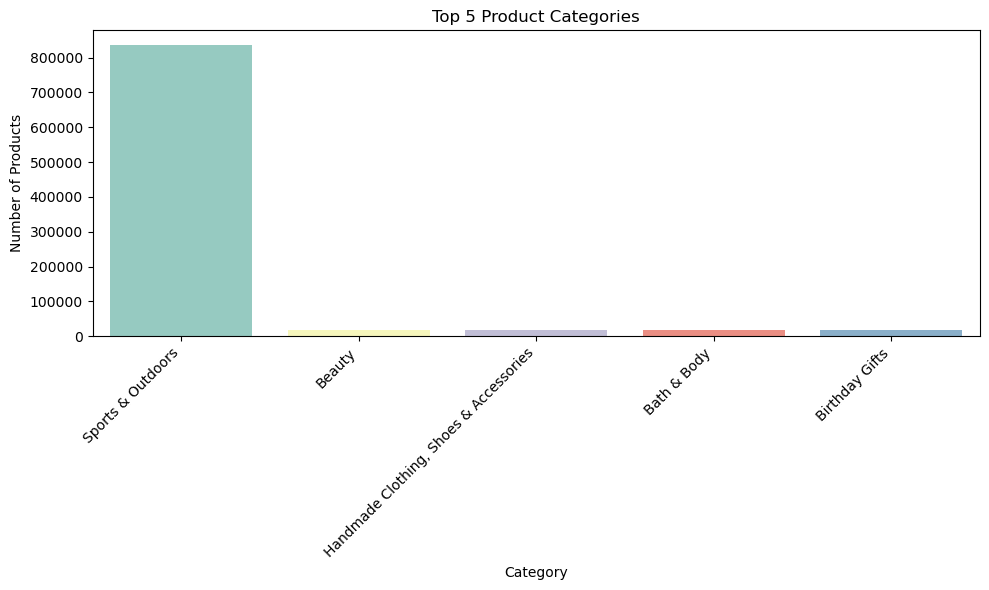

In [46]:
# Plotting a bar chart using the values from the frequency table, with colors siyrced from the "set3" palette 
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_categories,
    x='category',
    y='count',
    hue='category',       # Assigned x to hue for coloring
    palette="Set3",
    legend=False         # Disable legend to avoid clutter
)

plt.title("Top 5 Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

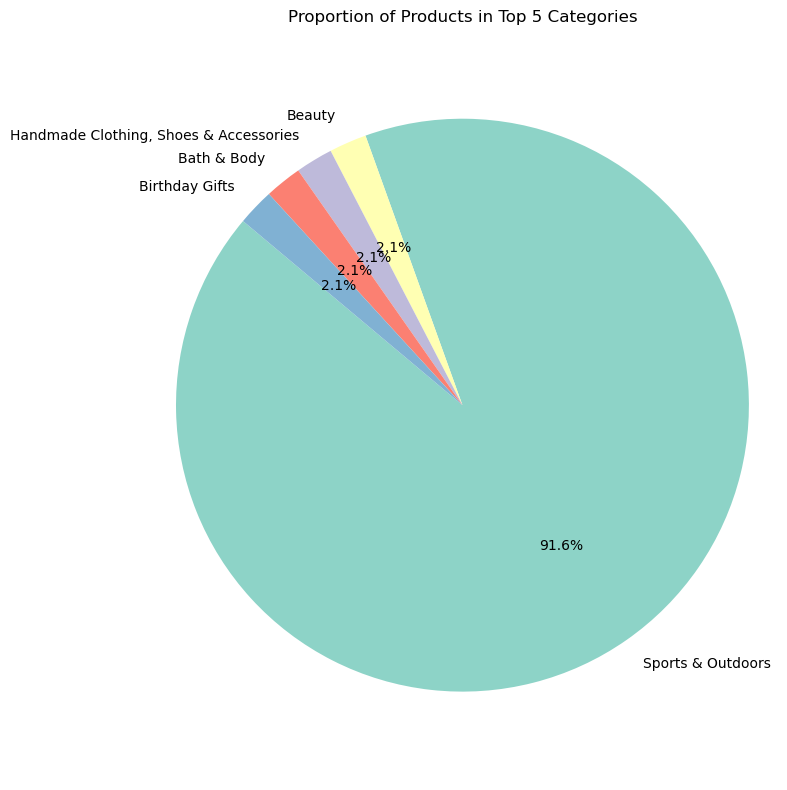

In [47]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_categories['count'],
    labels=top_5_categories['category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3")
)

plt.title("Proportion of Products in Top 5 Categories")
plt.axis('equal')  
plt.tight_layout()
plt.show()


## Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

**Measures of Centrality:**
1. Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

**2. Measures of Dispersion:**
- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

**3. Shape of the Distribution:**
- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

**4. Visualizations:**
- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [ ]:
# Part 3: Unpacking Product Ratings
#Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

# 1. Measures of Centrality:
# Calculate the mean, median, and mode for the rating of products.
# - How do customers generally rate products? Is there a common trend?

mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]  # mode() returns a Series

print(f"Mean: {mean_rating:.2f}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")

Mean: 2.15
Median: 0.0
Mode: 0.0


In [ ]:
# 2. Measures of Dispersion
# How spread out are the ratings?
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f"Variance: {variance_rating:.2f}")
print(f"Standard Deviation: {std_dev_rating:.2f}")
print(f"IQR: {iqr_rating:.2f}")

Variance: 4.82
Standard Deviation: 2.19
IQR: 4.40


In [ ]:
#3. Shape of the Distribution
skewness = df['stars'].skew()
kurtosis = df['stars'].kurt()

print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Skewness: 0.08
Kurtosis: -1.93


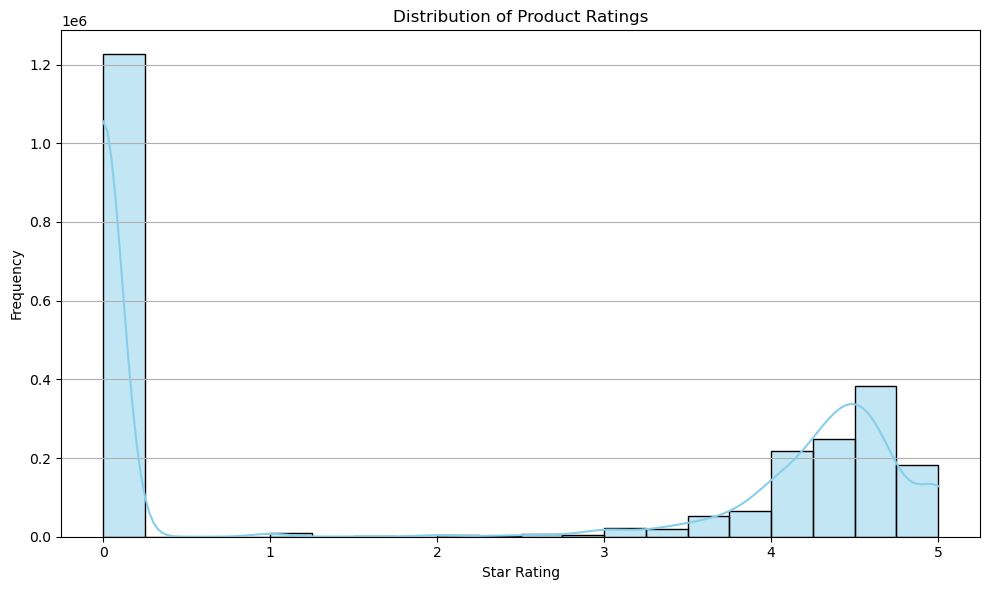

In [ ]:
#4. Visualisation: Histogram of Product Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Product Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()